In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#MCAR
df=pd.read_csv("C:/Users/AK/Desktop/project/Train.csv")

In [3]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Embarked',axis=1,inplace=True)

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
# Import Label encoder
from sklearn import preprocessing


l=['Sex']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[i])
    print(i,label_encoder.classes_)
    
    df[i]=label_encoder.transform(df[i])
    
df.head()

# 0-female 1-male

Sex ['female' 'male']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [6]:
d=df[df['Age'].isnull()].index.tolist()

df1=df.drop(df.index[[d]])

C:\Users\AK\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


# For fill out missing value in Age variable now we fit model on Age using other available complete data

In [7]:
y=df1['Age']
x=df1[['Survived','Pclass','Sex','SibSp','Parch','Fare']]
np.shape(x)

(714, 6)

In [8]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_tr.shape)
print(x_te.shape)

(499, 6)
(215, 6)


In [9]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_tr,y_tr)   

LinearRegression()

### print("Fitted model is given as : Age = ",round(lm.intercept_,4),round(lm.coef_[0],4),"Survived ",
      round(lm.coef_[1],4),"Pclass",round(lm.coef_[2],4),"Sex",round(lm.coef_[3],4),"SibSp",round(lm.coef_[4],4),"Parch",
      round(lm.coef_[5],4),"Fare")


In [11]:
# Prediction
y_pred1=lm.predict(x_te);
y_pred1

array([37.63846733, 36.22555189, 29.69712588, 32.27295286, 14.22826797,
       28.81084826, 28.82679861, 36.69193732, 14.22826797, 30.70509454,
       29.35139506, 24.47095142, 20.60437172, 33.68854291, 26.66982085,
       27.00604096, 21.44195229, 24.27815155, 21.44195229, 39.29310295,
       28.81014957, 28.81433695, 44.69452657, 34.90919053, 19.84169713,
       30.66498227, 37.87582388, 22.50629647, 24.93044029, 19.42126309,
       41.1948991 , 26.2111642 , 24.37111987, 28.80715858, 33.52436295,
       32.95552942, 27.04312922, 28.81084826, 28.81084826, 28.82630091,
       24.08102704, 20.60736271, 12.20145118, 32.27464695, 33.68116354,
       25.70196446, 20.87347031, 32.04151082, 36.68565625, 26.01302724,
       26.99766619, 33.79382357, 17.8833848 , 28.81014957, 29.04033228,
       28.79250274, 36.90173913, 28.81084826, 24.96982084,  5.91305072,
       36.95069084, 29.0343503 , 36.95069084, 35.99259956, 38.81684726,
       35.61174625, 28.81184366, 21.41255025, 30.72892195, 24.98

C:\Users\AK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

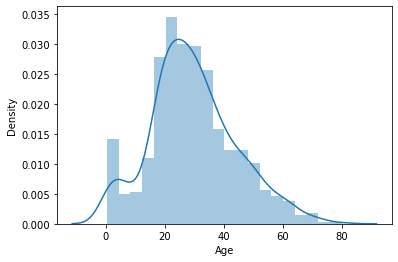

In [12]:
 sns.distplot(df1['Age'])

In [13]:
df['Age']=np.where(df['Age'].isnull(),55.7028-8.2028* df['Survived']-8.262*df['Pclass']-1.9171*df['Sex']-3.6841*df['SibSp']
                   -0.6568*df['Parch']-0.0239*df['Fare'],df['Age'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,25.358645,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [14]:
d1=df[df['Age']<0].index.tolist()
d1

[159, 180, 201, 324, 792, 846, 863]

In [15]:
print(df['Age'].median())
print(df['Age'].mean())

28.807305
29.31157644829402


In [16]:
for i in df['Age']:
    if i<0:
        df['Age']=df['Age'].replace(i,df['Age'].mean())
        #print(i)
# density plot shows positive skewed plot thus here we may use median for replacement      

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Now no missing values are available in our data

# Now evaluate the whole model using knn classification

In [18]:
y1=df['Survived']
x1=df[['Age','Pclass','Sex','SibSp','Parch','Fare']]
np.shape(x1)

(891, 6)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(623, 6)
(268, 6)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=25)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [22]:
#Predict the respose for test dataset
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [23]:
#Confusion matrix

from sklearn.metrics import confusion_matrix

confMat=confusion_matrix(y_test,y_pred)
confMat

array([[133,  21],
       [ 55,  59]], dtype=int64)

In [24]:
from sklearn import metrics

from sklearn.metrics import accuracy_score
#model accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7164179104477612


We get 71.64% accuracy by filling missing data using regression method and for evaluation we use knn classification

In [25]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_test,y_pred)
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  0.2835820895522388
MSE1:  0.2835820895522388
RMSE1:  0.5325242619376499


# Evaluating using logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lm=LogisticRegression(solver='liblinear',random_state=101).fit(x_train,y_train)

print("R square : ", lm.score(x_train,y_train))

R square :  0.8138041733547352
